# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, we'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [1]:
import json

In [2]:
#Your code here 
f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy.

In [3]:
#Your code here
for item in data:
    print (item, type(data[item]))

    
print()
print('data_children')
print(type(data['data']))
print(len(data['data']), 'entries for data')
print(len(data['data'][0]), 'columns per entry')

print()
print('meta_children')
print(data['meta'].keys())
print(len(data['meta']['view'].keys()), 'keys in view')
print(data['meta']['view'].keys(), 'keys in view')
print(len(data['meta']['view']['columns']))

print()
for item in data['meta']['view']['columns']:
    print (item['name'])

meta <class 'dict'>
data <class 'list'>

data_children
<class 'list'>
60266 entries for data
42 columns per entry

meta_children
dict_keys(['view'])
40 keys in view
dict_keys(['id', 'name', 'attribution', 'attributionLink', 'averageRating', 'category', 'createdAt', 'description', 'displayType', 'downloadCount', 'hideFromCatalog', 'hideFromDataJson', 'indexUpdatedAt', 'licenseId', 'newBackend', 'numberOfComments', 'oid', 'provenance', 'publicationAppendEnabled', 'publicationDate', 'publicationGroup', 'publicationStage', 'rowClass', 'rowsUpdatedAt', 'rowsUpdatedBy', 'tableId', 'totalTimesRated', 'viewCount', 'viewLastModified', 'viewType', 'columns', 'grants', 'license', 'metadata', 'owner', 'query', 'rights', 'tableAuthor', 'tags', 'flags']) keys in view
42

sid
id
position
created_at
created_meta
updated_at
updated_meta
meta
YearStart
YearEnd
LocationAbbr
LocationDesc
DataSource
Topic
Question
Response
DataValueUnit
DataValueType
DataValue
DataValueAlt
DataValueFootnoteSymbol
Datavalue

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [4]:
import pandas as pd

In [5]:
#Your code here
df = pd.DataFrame(data['data'])
df.columns = [item['name'] for item in data['meta']['view']['columns']]
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [17]:
asthma_over_18.columns

Index(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at',
       'updated_meta', 'meta', 'YearStart', 'YearEnd', 'LocationAbbr',
       'LocationDesc', 'DataSource', 'Topic', 'Question', 'Response',
       'DataValueUnit', 'DataValueType', 'DataValue', 'DataValueAlt',
       'DataValueFootnoteSymbol', 'DatavalueFootnote', 'LowConfidenceLimit',
       'HighConfidenceLimit', 'StratificationCategory1', 'Stratification1',
       'StratificationCategory2', 'Stratification2', 'StratificationCategory3',
       'Stratification3', 'GeoLocation', 'ResponseID', 'LocationID', 'TopicID',
       'QuestionID', 'DataValueTypeID', 'StratificationCategoryID1',
       'StratificationID1', 'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

/Users/dgoldstein24/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


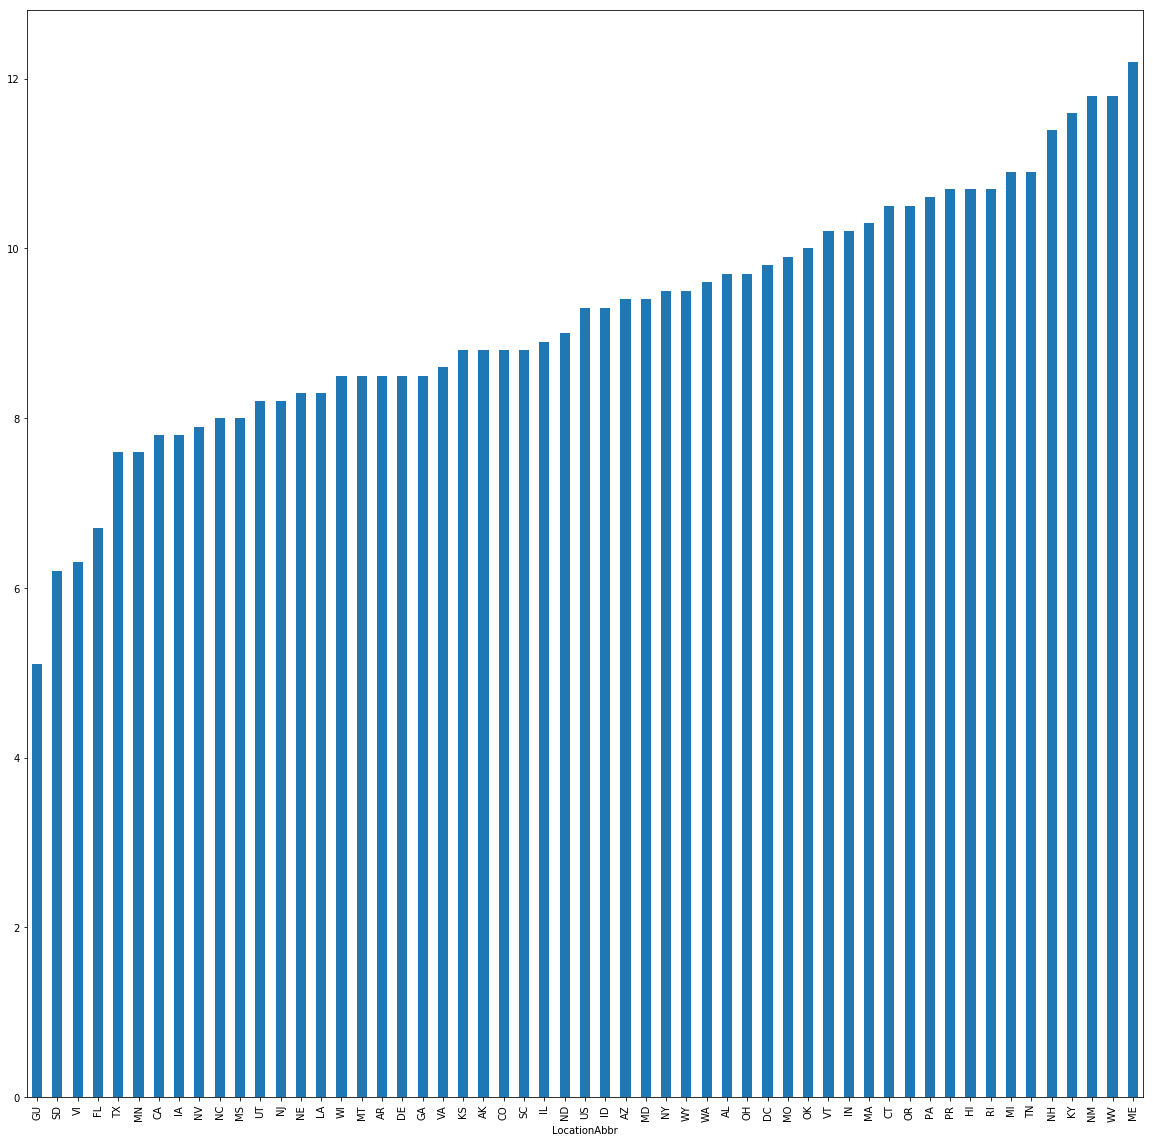

In [32]:
import matplotlib.pyplot as plt

df[df.Topic == 'Asthma'].Question.value_counts(normalize=True).cumsum()[:10]

asthma_over_18 = df[df.Question == 'Current asthma prevalence among adults aged >= 18 years']
asthma_over_18.DataValue = asthma_over_18.DataValue.astype(float)

asthma = asthma_over_18[asthma_over_18.StratificationCategoryID1 == 'OVERALL']

asthma = asthma[asthma.DataValueTypeID == 'CRDPREV']
asthma = asthma.sort_values(by = 'DataValue')
asthma.set_index('LocationAbbr', inplace=True)
asthma.head()
asthma.DataValue.plot(kind = 'bar', figsize = (20,20))


## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="outline.jpg" width=350>

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [34]:
# Your code here; you will probably want to define subfunctions.
def get_header(depth, exn):
    index_list = [['I', 'II', 'III', 'IV', 'V'], ['A', 'B', 'C', 'D', 'E'],['1', '2', '3', '4', '5'],['a', 'b', 'c', 'd', 'e'], ['i', 'ii', 'iii', 'iv', 'v']]
    d = depth % 5
    return index_list[d][exn]

def get_obj_length(obj):
    if type(obj) == dict:
        return '({} items)'.format(len(obj.keys()))
    elif type(obj) == list:
        return '({} items)'.format(len(obj))
    else:
        return ""
    
    
def obj_overview(obj, cur_printout, depth, exn, name=None):
    cur_header = get_header(depth, exn)
    obj_length = get_obj_length(obj)
    if cur_printout == "":
        cur_printout += "{}. root - {} {}".format(cur_header, type(obj), obj_length)
        return cur_printout
    else:
        spaces = ' '*depth*4
        newline = '\n{}{}. {}{} {}'.format(spaces, cur_header, name, type(obj), obj_length) #\n is for new line
        cur_printout += newline
        return cur_printout

def print_obj_outline(obj, cur_printout="", depth=0, exn=0, max_en=5, max_depth=10, name=""):
    cur_printout = obj_overview(obj, cur_printout, depth=depth, exn=exn, name=name)
    if type(obj) == list:
        n_items = 5
        if len(obj) < n_items:
            n_items = len(obj)
        for n, item in enumerate(obj[:n_items]):
            cur_printout = print_obj_outline(item, cur_printout=cur_printout, depth=depth+1, exn=n)
    elif type(obj) == dict:
        n_items = 5
        if len(obj.keys()) < n_items:
            n_items = len(obj.keys())
        firstn = list(obj.keys())[:n_items]
        for n, key in enumerate(firstn):
            if depth < max_depth:
                cur_printout = print_obj_outline(obj[key], cur_printout=cur_printout, depth=depth+1, exn=n, name=key+' ')
    else:
        pass
    return cur_printout

    

In [36]:
outline = print_obj_outline(data)

In [37]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

I. root - <class 'dict'> (2 items)
    A. meta <class 'dict'> (1 items)
        1. view <class 'dict'> (40 items)
            a. id <class 'str'> 
            b. name <class 'str'> 
            c. attribution <class 'str'> 
            d. attributionLink <class 'str'> 
            e. averageRating <class 'int'> 
    B. data <class 'list'> (60266 items)
        1. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        2. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        3. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <class 'str'> 
            c. <class 'int'> 
            d. <class 'int'> 
            e. <class 'str'> 
        4. <class 'list'> (42 items)
            a. <class 'int'> 
            b. <c

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 